<a href="https://colab.research.google.com/github/hisyamhilmiomar/algoTradingStrat/blob/main/RSI_(Relative_Strength_Index)_Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

General Condition : Stock price is above it's 200-day Moving average.

Buy if :-
  - 10-period RSI of stock is below 30
      -> Buy on next day's open
  
Sell if :-
  - 10-period RSI is above 40 OR after 10 trading days
      -> Sell on next day's open

Universe of stocks to test this strategy :- All 505 single S&P stocks

In [ ]:
#importing necessary libraries

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment= None

In [ ]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [ ]:
tickers = tickers.Symbol.to_list()
tickers = [i.replace('.','-') for i in tickers]
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA'

In [ ]:
tickers[466]

'VLTO'

In [ ]:
#Problematic tickers, WRK, GEV(VNT not on the list)
tickers.pop(492)
tickers.pop(213)
tickers.pop(419)
tickers.pop(466)


'VLTO'

In [ ]:
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA'

In [ ]:
def RSICalc(asset):
  df = yf.download(asset, start = '2014-01-01')
  df ['MA200'] = df['Adj Close'].rolling(window=200).mean() #To retrieve the 200 day moving average
  df['Price Change'] = df['Adj Close'].pct_change()
  df['Upmove'] = df['Price Change'].apply(lambda x: x if x > 0 else 0) #Defining upmove
  df['Downmove'] = df['Price Change'].apply(lambda x: abs(x) if x < 0 else 0 ) # Defining downmove
  df['Avg Up'] = df['Upmove'].ewm(span =19). mean()
  df['Avg Down'] = df['Downmove'].ewm(span =19). mean()
  df = df.dropna()
  df['RS'] = df['Avg Up']/df['Avg Down']
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
  df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
  df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'
  return df




In [ ]:
def getSignals(df):
  Buying_dates = []
  Selling_dates = []

  for i in range(len(df) - 11):  # Ensure enough rows to check up to 10 days ahead
        if "Yes" in df['Buy'].iloc[i]:
            Buying_dates.append(df.index[i + 1])  # Appending the next date

            for j in range(1, 11):
                if df['RSI'].iloc[i + j] > 40:
                    Selling_dates.append(df.index[i + j + 1])
                    break
                elif j == 10:
                    Selling_dates.append(df.index[i + j + 1])

  return Buying_dates,Selling_dates



In [ ]:
frame = RSICalc(tickers[0])
buy,sell = getSignals(frame)

[*********************100%%**********************]  1 of 1 completed


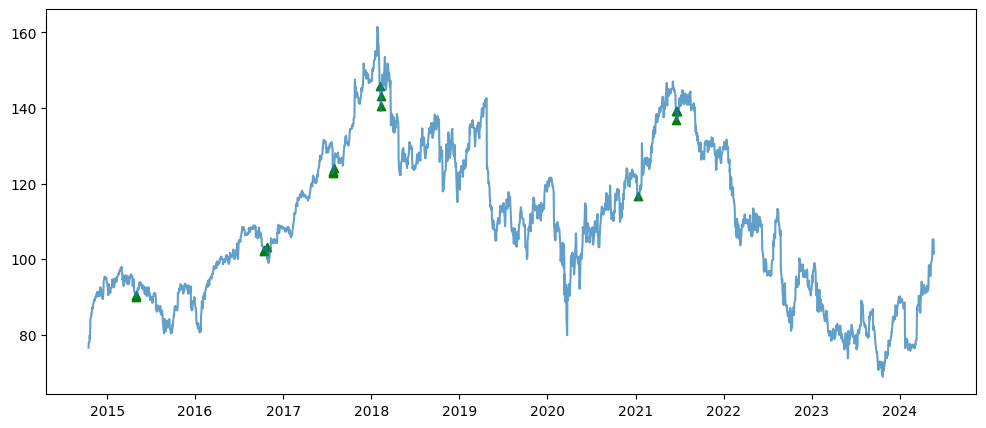

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[buy].index, frame.loc[buy]['Adj Close'], marker ='^', c='g')
plt.plot(frame['Adj Close'], alpha =0.7)

In [ ]:
profit = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/ frame.loc[buy].Open.values

In [ ]:
profit

array([ 0.01300845,  0.01320229, -0.00076646,  0.00355307, -0.01841874,
        0.01366924,  0.02033738,  0.01195275,  0.01594998,  0.00852708,
        0.02154841,  0.00861575,  0.01892713, -0.00528457,  0.01409034,
        0.01120923])

In [ ]:
wins = [i for i in profit if i>0]

In [ ]:
len(wins)/len(profit)

0.8125

In [ ]:
len(profit)

16

In [ ]:
matrixSignals = []
matrixProfits = []

for i in range(len(tickers)):
  print(tickers[i])
  frame = RSICalc(tickers[i])
  buy,sell = getSignals(frame)
  profit = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/ frame.loc[buy].Open.values
  matrixSignals.append(buy)
  matrixProfits.append(profit)

MMM


[*********************100%%**********************]  1 of 1 completed


AOS


[*********************100%%**********************]  1 of 1 completed


ABT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ABBV



[*********************100%%**********************]  1 of 1 completed


ACN
ADBE


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


AMD
AES


[*********************100%%**********************]  1 of 1 completed


AFL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

A


APD


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


ABNB
AKAM


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ALB



[*********************100%%**********************]  1 of 1 completed

ARE



[*********************100%%**********************]  1 of 1 completed


ALGN
ALLE


[*********************100%%**********************]  1 of 1 completed


LNT


[*********************100%%**********************]  1 of 1 completed


ALL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

GOOGL



[*********************100%%**********************]  1 of 1 completed

GOOG


MO


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

AMZN


AMCR


[*********************100%%**********************]  1 of 1 completed


AEE


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

AAL


AEP


[*********************100%%**********************]  1 of 1 completed


AXP


[*********************100%%**********************]  1 of 1 completed


AIG


[*********************100%%**********************]  1 of 1 completed


AMT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

AWK



[*********************100%%**********************]  1 of 1 completed

AMP



[*********************100%%**********************]  1 of 1 completed

AME



[*********************100%%**********************]  1 of 1 completed

AMGN


APH


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ADI



[*********************100%%**********************]  1 of 1 completed


ANSS


[*********************100%%**********************]  1 of 1 completed

AON



[*********************100%%**********************]  1 of 1 completed

APA



[*********************100%%**********************]  1 of 1 completed

AAPL


AMAT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

APTV



[*********************100%%**********************]  1 of 1 completed


ACGL
ADM


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


ANET
AJG


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

AIZ


T


[*********************100%%**********************]  1 of 1 completed


ATO


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


ADSK
ADP


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


AZO


[*********************100%%**********************]  1 of 1 completed

AVB



[*********************100%%**********************]  1 of 1 completed

AVY



[*********************100%%**********************]  1 of 1 completed


AXON
BKR


[*********************100%%**********************]  1 of 1 completed


BALL


[*********************100%%**********************]  1 of 1 completed


BAC


[*********************100%%**********************]  1 of 1 completed


BK


[*********************100%%**********************]  1 of 1 completed


BBWI


[*********************100%%**********************]  1 of 1 completed


BAX


[*********************100%%**********************]  1 of 1 completed


BDX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


BRK-B
BBY


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


BIO
TECH


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


BIIB
BLK


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


BX
BA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


BKNG
BWA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

BXP



[*********************100%%**********************]  1 of 1 completed


BSX
BMY


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

AVGO


BR


[*********************100%%**********************]  1 of 1 completed


BRO


[*********************100%%**********************]  1 of 1 completed


BF-B


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

BLDR


BG


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

CDNS



[*********************100%%**********************]  1 of 1 completed


CZR
CPT


[*********************100%%**********************]  1 of 1 completed


CPB


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

COF


CAH


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


KMX
CCL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


CARR
CTLT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

CAT



[*********************100%%**********************]  1 of 1 completed


CBOE
CBRE


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


CDW
CE


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

COR



[*********************100%%**********************]  1 of 1 completed


CNC
CNP


[*********************100%%**********************]  1 of 1 completed


CF


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

CHRW



[*********************100%%**********************]  1 of 1 completed

CRL



[*********************100%%**********************]  1 of 1 completed

SCHW



[*********************100%%**********************]  1 of 1 completed


CHTR
CVX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


CMG
CB


[*********************100%%**********************]  1 of 1 completed


CHD


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

CI



[*********************100%%**********************]  1 of 1 completed

CINF



[*********************100%%**********************]  1 of 1 completed

CTAS



[*********************100%%**********************]  1 of 1 completed

CSCO



[*********************100%%**********************]  1 of 1 completed

C



[*********************100%%**********************]  1 of 1 completed


CFG
CLX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

CME


CMS


[*********************100%%**********************]  1 of 1 completed


KO


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

CTSH


CL


[*********************100%%**********************]  1 of 1 completed


CMCSA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

CMA


CAG


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

COP


ED


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

STZ



[*********************100%%**********************]  1 of 1 completed


CEG
COO


[*********************100%%**********************]  1 of 1 completed


CPRT


[*********************100%%**********************]  1 of 1 completed


GLW


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

CPAY



[*********************100%%**********************]  1 of 1 completed

CTVA
CSGP



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

COST



[*********************100%%**********************]  1 of 1 completed

CTRA



[*********************100%%**********************]  1 of 1 completed

CCI


CSX


[*********************100%%**********************]  1 of 1 completed


CMI


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

CVS



[*********************100%%**********************]  1 of 1 completed

DHR



[*********************100%%**********************]  1 of 1 completed

DRI



[*********************100%%**********************]  1 of 1 completed


DVA
DAY


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


DECK
DE


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


DAL
DVN


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

DXCM



[*********************100%%**********************]  1 of 1 completed


FANG
DLR


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

DFS



[*********************100%%**********************]  1 of 1 completed


DG
DLTR


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

D



[*********************100%%**********************]  1 of 1 completed

DPZ



[*********************100%%**********************]  1 of 1 completed

DOV



[*********************100%%**********************]  1 of 1 completed


DOW
DHI


[*********************100%%**********************]  1 of 1 completed


DTE


[*********************100%%**********************]  1 of 1 completed


DUK


[*********************100%%**********************]  1 of 1 completed


DD


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

EMN



[*********************100%%**********************]  1 of 1 completed

ETN



[*********************100%%**********************]  1 of 1 completed

EBAY


ECL


[*********************100%%**********************]  1 of 1 completed


EIX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

EW



[*********************100%%**********************]  1 of 1 completed

EA



[*********************100%%**********************]  1 of 1 completed

ELV


LLY


[*********************100%%**********************]  1 of 1 completed


EMR


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


ENPH
ETR


[*********************100%%**********************]  1 of 1 completed


EOG


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


EPAM


[*********************100%%**********************]  1 of 1 completed

EQT



[*********************100%%**********************]  1 of 1 completed

EFX


EQIX


[*********************100%%**********************]  1 of 1 completed


EQR


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ESS


EL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ETSY


EG


[*********************100%%**********************]  1 of 1 completed


EVRG


[*********************100%%**********************]  1 of 1 completed


ES


[*********************100%%**********************]  1 of 1 completed


EXC


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

EXPE



[*********************100%%**********************]  1 of 1 completed

EXPD



[*********************100%%**********************]  1 of 1 completed

EXR


XOM


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


FFIV
FDS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

FICO


FAST


[*********************100%%**********************]  1 of 1 completed


FRT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

FDX



[*********************100%%**********************]  1 of 1 completed

FIS


FITB


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


FSLR
FE


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


FI
FMC


[*********************100%%**********************]  1 of 1 completed


F


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


FTNT
FTV


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


FOXA
FOX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

BEN



[*********************100%%**********************]  1 of 1 completed

FCX



[*********************100%%**********************]  1 of 1 completed

GRMN



[*********************100%%**********************]  1 of 1 completed

IT


GE


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


GEHC
GEN


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


GNRC
GD


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

GIS



[*********************100%%**********************]  1 of 1 completed


GM
GPC


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

GILD



[*********************100%%**********************]  1 of 1 completed

GPN



[*********************100%%**********************]  1 of 1 completed

GL



[*********************100%%**********************]  1 of 1 completed

GS
HAL

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

HIG



[*********************100%%**********************]  1 of 1 completed

HAS



[*********************100%%**********************]  1 of 1 completed

HCA


DOC


[*********************100%%**********************]  1 of 1 completed


HSIC


[*********************100%%**********************]  1 of 1 completed


HSY


[*********************100%%**********************]  1 of 1 completed


HES


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

HPE


HLT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

HOLX


HD


[*********************100%%**********************]  1 of 1 completed


HON


[*********************100%%**********************]  1 of 1 completed


HRL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

HST



[*********************100%%**********************]  1 of 1 completed


HWM
HPQ


[*********************100%%**********************]  1 of 1 completed


HUBB


[*********************100%%**********************]  1 of 1 completed


HUM


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

HBAN



[*********************100%%**********************]  1 of 1 completed


HII
IBM


[*********************100%%**********************]  1 of 1 completed


IEX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

IDXX


ITW


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


ILMN
INCY


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


IR
PODD


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

INTC



[*********************100%%**********************]  1 of 1 completed

ICE


IFF


[*********************100%%**********************]  1 of 1 completed


IP


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

IPG



[*********************100%%**********************]  1 of 1 completed

INTU



[*********************100%%**********************]  1 of 1 completed


ISRG
IVZ


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


INVH
IQV


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

IRM


JBHT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

JBL


JKHY


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


J
JNJ


[*********************100%%**********************]  1 of 1 completed


JCI


[*********************100%%**********************]  1 of 1 completed


JPM


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

JNPR


K


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


KVUE
KDP


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

KEY



[*********************100%%**********************]  1 of 1 completed


KEYS
KMB


[*********************100%%**********************]  1 of 1 completed


KIM


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

KMI



[*********************100%%**********************]  1 of 1 completed

KLAC


KHC


[*********************100%%**********************]  1 of 1 completed


KR


[*********************100%%**********************]  1 of 1 completed


LHX


[*********************100%%**********************]  1 of 1 completed


LH


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

LRCX



[*********************100%%**********************]  1 of 1 completed

LW



[*********************100%%**********************]  1 of 1 completed

LVS



[*********************100%%**********************]  1 of 1 completed

LDOS


LEN


[*********************100%%**********************]  1 of 1 completed


LIN


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


LYV
LKQ


[*********************100%%**********************]  1 of 1 completed


LMT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

L


LOW


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


LULU
LYB


[*********************100%%**********************]  1 of 1 completed


MTB


[*********************100%%**********************]  1 of 1 completed


MRO


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

MPC



[*********************100%%**********************]  1 of 1 completed


MKTX


[*********************100%%**********************]  1 of 1 completed

MAR


MMC


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

MLM


MAS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

MA



[*********************100%%**********************]  1 of 1 completed

MTCH


MKC


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

MCD



[*********************100%%**********************]  1 of 1 completed

MCK



[*********************100%%**********************]  1 of 1 completed

MDT


MRK


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


META
MET


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MTD


[*********************100%%**********************]  1 of 1 completed

MGM


MCHP


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MU


[*********************100%%**********************]  1 of 1 completed


MSFT


[*********************100%%**********************]  1 of 1 completed

MAA



[*********************100%%**********************]  1 of 1 completed


MRNA
MHK


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MOH
TAP


[*********************100%%**********************]  1 of 1 completed


MDLZ


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MPWR
MNST


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MCO
MS


[*********************100%%**********************]  1 of 1 completed


MOS


[*********************100%%**********************]  1 of 1 completed


MSI


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

MSCI


NDAQ


[*********************100%%**********************]  1 of 1 completed


NTAP


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

NFLX


NEM


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

NWSA



[*********************100%%**********************]  1 of 1 completed

NWS


NEE


[*********************100%%**********************]  1 of 1 completed


NKE


[*********************100%%**********************]  1 of 1 completed


NI


[*********************100%%**********************]  1 of 1 completed


NDSN


[*********************100%%**********************]  1 of 1 completed


NSC


[*********************100%%**********************]  1 of 1 completed


NTRS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

NOC



[*********************100%%**********************]  1 of 1 completed


NCLH
NRG


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

NUE



[*********************100%%**********************]  1 of 1 completed

NVDA



[*********************100%%**********************]  1 of 1 completed


NVR
NXPI


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


ORLY
OXY


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ODFL



[*********************100%%**********************]  1 of 1 completed

OMC



[*********************100%%**********************]  1 of 1 completed


ON
OKE


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ORCL



[*********************100%%**********************]  1 of 1 completed


OTIS
PCAR


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


PKG


[*********************100%%**********************]  1 of 1 completed

PANW



[*********************100%%**********************]  1 of 1 completed

PARA



[*********************100%%**********************]  1 of 1 completed

PH



[*********************100%%**********************]  1 of 1 completed

PAYX



[*********************100%%**********************]  1 of 1 completed


PAYC
PYPL


[*********************100%%**********************]  1 of 1 completed


PNR


[*********************100%%**********************]  1 of 1 completed


PEP


[*********************100%%**********************]  1 of 1 completed


PFE


[*********************100%%**********************]  1 of 1 completed


PCG


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


PM
PSX

[*********************100%%**********************]  1 of 1 completed

PNW


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

PNC



[*********************100%%**********************]  1 of 1 completed

POOL


PPG


[*********************100%%**********************]  1 of 1 completed


PPL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

PFG


PG


[*********************100%%**********************]  1 of 1 completed


PGR


[*********************100%%**********************]  1 of 1 completed


PLD


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

PRU


PEG


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

PTC


PSA


[*********************100%%**********************]  1 of 1 completed


PHM


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


QRVO
PWR


[*********************100%%**********************]  1 of 1 completed


QCOM


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

DGX



[*********************100%%**********************]  1 of 1 completed

RL


RJF


[*********************100%%**********************]  1 of 1 completed


RTX


[*********************100%%**********************]  1 of 1 completed


O


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

REG



[*********************100%%**********************]  1 of 1 completed

REGN


RF


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

RSG



[*********************100%%**********************]  1 of 1 completed

RMD



[*********************100%%**********************]  1 of 1 completed

RVTY


RHI


[*********************100%%**********************]  1 of 1 completed


ROK


[*********************100%%**********************]  1 of 1 completed


ROL


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ROP



[*********************100%%**********************]  1 of 1 completed

ROST



[*********************100%%**********************]  1 of 1 completed

RCL


SPGI


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


CRM
SBAC


[*********************100%%**********************]  1 of 1 completed


SLB


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

STX



[*********************100%%**********************]  1 of 1 completed

SRE



[*********************100%%**********************]  1 of 1 completed


NOW
SHW


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

SPG



[*********************100%%**********************]  1 of 1 completed


SWKS


[*********************100%%**********************]  1 of 1 completed

SJM


SNA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

SO



[*********************100%%**********************]  1 of 1 completed

LUV



[*********************100%%**********************]  1 of 1 completed

SWK


SBUX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

STT



[*********************100%%**********************]  1 of 1 completed

STLD



[*********************100%%**********************]  1 of 1 completed

STE



[*********************100%%**********************]  1 of 1 completed

SYK



[*********************100%%**********************]  1 of 1 completed

SMCI



[*********************100%%**********************]  1 of 1 completed

SYF



[*********************100%%**********************]  1 of 1 completed

SNPS


SYY


[*********************100%%**********************]  1 of 1 completed


TMUS


[*********************100%%**********************]  1 of 1 completed


TROW


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

TTWO



[*********************100%%**********************]  1 of 1 completed

TPR



[*********************100%%**********************]  1 of 1 completed

TRGP



[*********************100%%**********************]  1 of 1 completed

TGT



[*********************100%%**********************]  1 of 1 completed

TEL



[*********************100%%**********************]  1 of 1 completed


TDY
TFX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

TER



[*********************100%%**********************]  1 of 1 completed

TSLA


TXN


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

TXT



[*********************100%%**********************]  1 of 1 completed

TMO


TJX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

TSCO


TT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


TDG
TRV


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

TRMB



[*********************100%%**********************]  1 of 1 completed

TFC



[*********************100%%**********************]  1 of 1 completed


TYL
TSN


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

USB



[*********************100%%**********************]  1 of 1 completed


UBER
UDR


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


ULTA
UNP


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


UAL
UPS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

URI



[*********************100%%**********************]  1 of 1 completed

UNH



[*********************100%%**********************]  1 of 1 completed

UHS


VLO


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

VTR



[*********************100%%**********************]  1 of 1 completed

VRSN


VRSK


[*********************100%%**********************]  1 of 1 completed


VZ


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

VRTX


VTRS


[*********************100%%**********************]  1 of 1 completed


VICI


[*********************100%%**********************]  1 of 1 completed


V


[*********************100%%**********************]  1 of 1 completed


VST


[*********************100%%**********************]  1 of 1 completed


VMC


[*********************100%%**********************]  1 of 1 completed


WRB


[*********************100%%**********************]  1 of 1 completed


GWW


[*********************100%%**********************]  1 of 1 completed


WAB


[*********************100%%**********************]  1 of 1 completed


WBA


[*********************100%%**********************]  1 of 1 completed


WMT


[*********************100%%**********************]  1 of 1 completed


DIS


[*********************100%%**********************]  1 of 1 completed


WBD


[*********************100%%**********************]  1 of 1 completed


WM


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

WAT


WEC


[*********************100%%**********************]  1 of 1 completed


WFC


[*********************100%%**********************]  1 of 1 completed


WELL


[*********************100%%**********************]  1 of 1 completed


WST


[*********************100%%**********************]  1 of 1 completed


WDC


[*********************100%%**********************]  1 of 1 completed


WY


[*********************100%%**********************]  1 of 1 completed


WMB


[*********************100%%**********************]  1 of 1 completed


WTW


[*********************100%%**********************]  1 of 1 completed


WYNN


[*********************100%%**********************]  1 of 1 completed


XEL


[*********************100%%**********************]  1 of 1 completed


XYL


[*********************100%%**********************]  1 of 1 completed


YUM


[*********************100%%**********************]  1 of 1 completed


ZBRA


[*********************100%%**********************]  1 of 1 completed


ZBH


[*********************100%%**********************]  1 of 1 completed


ZTS


[*********************100%%**********************]  1 of 1 completed


In [ ]:
allProfit = []

for i in matrixProfits:
  for e in i :
    allProfit.append(e)

In [ ]:
wins = [i for i in allProfit if i>0]

In [ ]:
len(wins)/len(allProfit)

0.7102898452807243

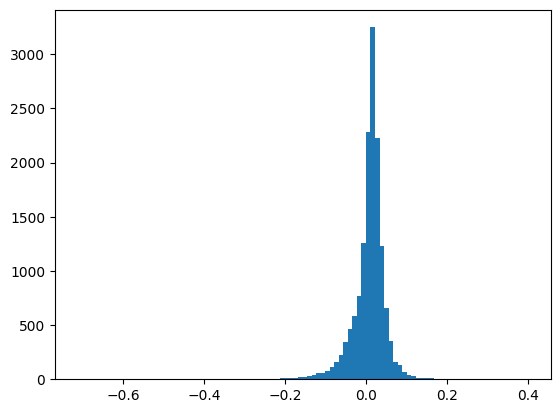

In [ ]:
plt.hist(allProfit, bins =100)
plt.show()

In [ ]:
for i in matrixSignals:
  for e in i:
    if e.year == 2021:
      print(e)

2021-01-12 00:00:00
2021-06-17 00:00:00
2021-06-18 00:00:00
2021-06-21 00:00:00
2021-09-15 00:00:00
2021-09-16 00:00:00
2021-09-17 00:00:00
2021-09-20 00:00:00
2021-09-28 00:00:00
2021-09-29 00:00:00
2021-09-30 00:00:00
2021-10-01 00:00:00
2021-09-03 00:00:00
2021-09-07 00:00:00
2021-09-08 00:00:00
2021-09-28 00:00:00
2021-09-29 00:00:00
2021-09-30 00:00:00
2021-10-01 00:00:00
2021-10-04 00:00:00
2021-10-05 00:00:00
2021-10-06 00:00:00
2021-10-07 00:00:00
2021-05-06 00:00:00
2021-05-07 00:00:00
2021-05-10 00:00:00
2021-05-11 00:00:00
2021-05-12 00:00:00
2021-05-13 00:00:00
2021-05-14 00:00:00
2021-06-18 00:00:00
2021-06-21 00:00:00
2021-06-23 00:00:00
2021-06-24 00:00:00
2021-09-21 00:00:00
2021-09-22 00:00:00
2021-09-23 00:00:00
2021-03-05 00:00:00
2021-09-29 00:00:00
2021-09-30 00:00:00
2021-10-01 00:00:00
2021-10-04 00:00:00
2021-10-05 00:00:00
2021-10-06 00:00:00
2021-10-07 00:00:00
2021-10-08 00:00:00
2021-10-11 00:00:00
2021-10-12 00:00:00
2021-10-13 00:00:00
2021-10-14 00:00:00
